In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from matplotlib import animation, rc

from matplotlib.pylab import rcParams 

from IPython.display import HTML
import warnings

warnings.filterwarnings('ignore')

In [2]:
prices = pd.read_csv('example_sprit_cut_prices.csv', delimiter= ';')
stations = pd.read_csv('example_sprit_cut_station.csv', delimiter = ';')

In [3]:
prices.head()

print(prices.shape)

prices = prices.drop_duplicates()

print(prices.shape)

(2189526, 6)
(1094763, 6)


In [4]:
stations.head()

stations.shape

(824, 12)

In [5]:
total_locations = len(stations.PLACE.unique())

"{} {}".format("Number of different locations :", total_locations)

'Number of different locations : 199'

In [6]:
total_unique_brands = len(stations.BRAND.unique())

"{} {}".format("Number of different brands :", total_unique_brands)

'Number of different brands : 56'

In [7]:
prices["Year"] = pd.DatetimeIndex(prices['DATE_CHANGED']).year
prices['Month'] = pd.DatetimeIndex(prices['DATE_CHANGED']).month

Removing the outliers and cleaning the data

In [85]:
prices = prices[prices['E5'].between(0,2000,inclusive=False)]
prices = prices[prices['E10'].between(0,2000,inclusive=False)]
prices = prices[prices['DIESEL'].between(0,2000,inclusive=False)]

### Minimum Price

In [86]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].min()

E5   E10  DIESEL
Year Month                    
2014 6      1479  1399    1259
     7      1469  1199    1259
     8      1000  1000    1000
     9      1459  1419    1259
     10     1000  1129    1099
     11     1349  1259    1131
     12     1195  1155    1075
2015 1      1059  1029     999
     2      1159  1109    1009
     3      1179  1009    1099
     4      1159  1299    1109
     5      1239  1219    1119
     6      1165  1359    1119
     7      1379  1199    1079
     8      1269  1249    1009
     9         8  1219    1039

### Maximum Price 

In [87]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].max()

E5   E10  DIESEL
Year Month                    
2014 6      1759  1709    1549
     7      1999  1999    1999
     8      1709  1679    1589
     9      1719  1690    1519
     10     1699  1659    1549
     11     1669  1629    1489
     12     1579  1539    1469
2015 1      1479  1459    1329
     2      1509  1509    1359
     3      1569  1549    1690
     4      1629  1609    1529
     5      1649  1629    1429
     6      1829  1809    1589
     7      1749  1729    1489
     8      1639  1879    1519
     9      1559  1539    1390

### Average Price

In [102]:
price_avg = prices.groupby(['Year','Month'])['E5','E10','DIESEL'].mean()
price_avg

E5          E10       DIESEL
Year Month                                       
2014 6      1605.555368  1565.540711  1394.600135
     7      1591.172901  1551.156774  1377.131490
     8      1569.622428  1529.685335  1378.596727
     9      1564.970572  1525.205070  1368.238987
     10     1518.905655  1479.116417  1330.455879
     11     1477.657232  1437.882413  1310.241900
     12     1359.330096  1319.566583  1212.358210
2015 1      1291.019933  1267.229026  1137.437586
     2      1351.193294  1331.214375  1198.646089
     3      1405.739196  1385.690463  1216.555743
     4      1450.449425  1430.425877  1226.549538
     5      1480.901980  1460.884671  1255.909735
     6      1488.157156  1468.127218  1236.465842
     7      1492.101606  1472.115862  1202.840376
     8      1419.384598  1399.370829  1142.487323
     9      1358.995367  1339.032370  1141.190953

In [89]:
#Merging both the tables
mergedData = pd.merge(prices, stations, left_on = 'STID', right_on = 'ID')

In [48]:
mergedData

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Year,Month,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
5,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
9,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [50]:
#Making the Place, Brand and Name in Uppercase to avoid duplicates.
mergedData['PLACE'] = mergedData['PLACE'].str.upper()
mergedData['BRAND'] = mergedData['BRAND'].str.upper()
mergedData['NAME'] = mergedData['NAME'].str.upper()

In [90]:
#Which city sells most quantity of Fuel?

placeFC = mergedData.groupby(['PLACE'])['CHANGED'].sum().sort_values( ascending=False)
print (placeFC)

PLACE
Karlsruhe                  2856608
Ludwigshafen               1711766
Mannheim                   1587426
Kaiserslautern             1299494
KARLSRUHE                  1227764
MANNHEIM                    946786
LUDWIGSHAFEN                910018
Worms                       850150
Speyer                      750956
KAISERSLAUTERN              722948
WORMS                       671366
RASTATT                     661566
FRANKENTHAL                 591586
PIRMASENS                   541640
Ettlingen                   514224
LANDAU                      491310
Neustadt                    486248
Pirmasens                   480606
WOERTH                      463068
Gernsheim                   426382
HASSLOCH                    419708
Phillipsburg                374900
Edenkoben                   369972
Landau                      361672
Lampertheim                 349680
MUTTERSTADT                 342678
Schifferstadt               339320
Rastatt                     338868
GERMERSHEIM   

(0, 10)

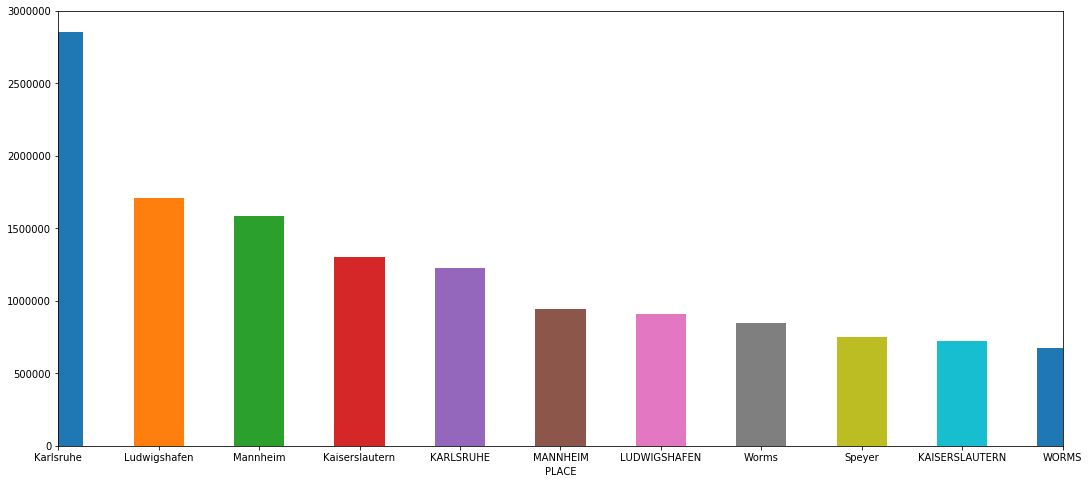

In [98]:
ax = placeFC.plot.bar(x='PLACE', y='CHANGED', rot=0)
ax.set_xlim(0,10)

In [91]:
#Which Brand sells most quantity of Fuel?

brandFC = mergedData.groupby(['BRAND'])['CHANGED'].sum().sort_values( ascending=False)
print (brandFC)

BRAND
Shell                                                 7285816
ARAL                                                  7029516
ESSO                                                  4396118
AVIA                                                  4242918
Total                                                 2936864
JET                                                   2650586
Agip                                                  1379886
BFT                                                   1322784
OMV                                                   1129868
Supermarkt-Tankstelle am real- Markt                   985698
OIL!                                                   793238
bft                                                    494926
HEM                                                    488566
SB                                                     472662
T                                                      415452
Supermarkt-Tankstelle                                  399674
ED

(0, 10)

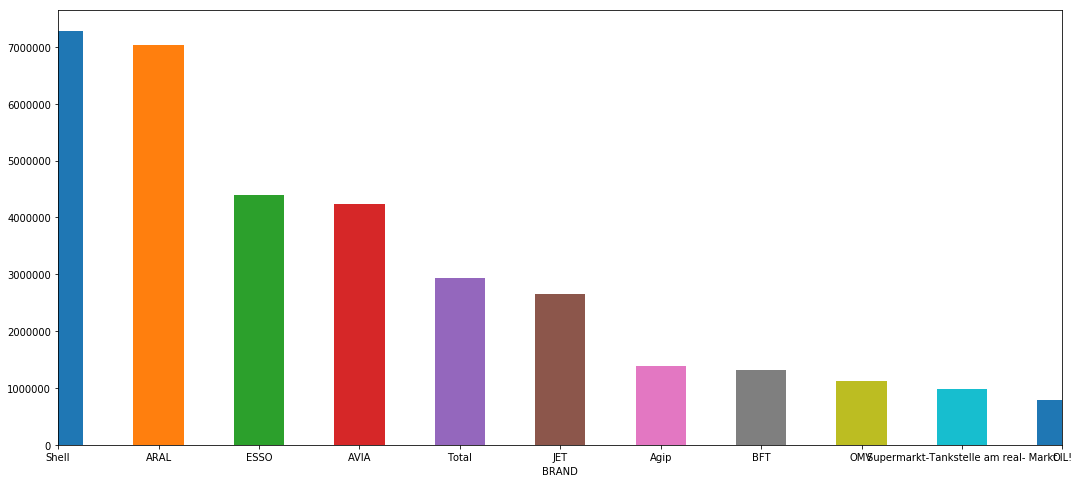

In [92]:
ax = brandFC.plot.bar(x='BRAND', y='CHANGED', rot=0)
ax.set_xlim(0,10)

In [93]:
#Which Fuel Station sells most quantity of Fuel?

nameFC = mergedData.groupby(['NAME'])['CHANGED'].sum().sort_values( ascending=False)
print (nameFC)

NAME
Aral Tankstelle                                                      6975380
Esso Tankstelle                                                      4396118
Preis Tankstelle                                                      247824
Total EDESHEIM                                                        234612
Total WOERTH                                                          229978
AVIA Servicestation                                                   219800
Total RASTATT                                                         218362
ZG Raiffeisen Tankstelle Karlsruhe                                    215806
AVIA Phillipsburg                                                     187866
AVIA Phillipsburg-Rheinsheim                                          187034
Total MANNHEIM                                                        180536
AVIA Karlsruhe-Nordweststadt                                          172094
AVIA Au am Rhein                                                      1

(0, 10)

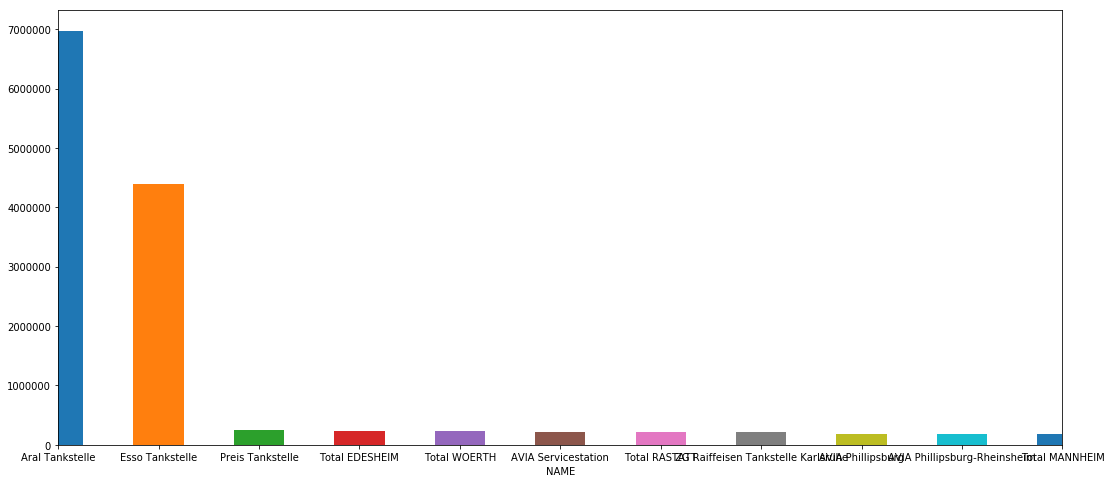

In [94]:
ax = nameFC.plot.bar(x='NAME', y='CHANGED', rot=0)
ax.set_xlim(0,10)


In [95]:
prices.columns

df = prices[['E5','E10','DIESEL','DATE_CHANGED']]

df['DATE_CHANGED'] = pd.to_datetime(df['DATE_CHANGED'])

df = df.set_index('DATE_CHANGED')

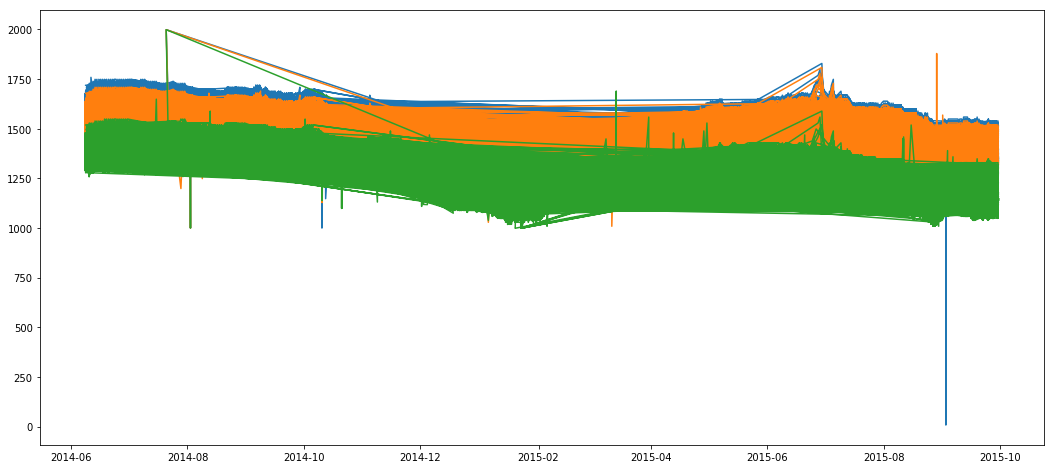

In [96]:
rcParams['figure.figsize'] = 18, 8 

plt.plot(df['E5'])

plt.plot(df['E10'])

plt.plot(df['DIESEL'])

Outliers in the Price , either need to remove or standardize the data for predictive model

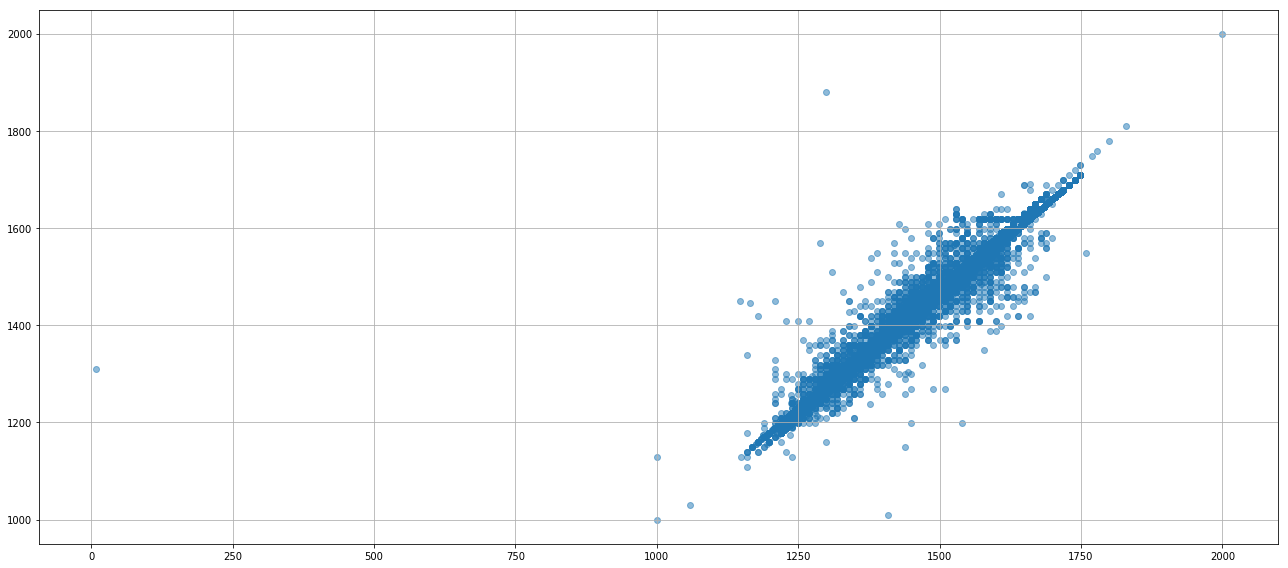

In [97]:
fig, ax = plt.subplots()
ax.scatter(df['E5'], df['E10'], alpha=0.5)


ax.grid(True)
fig.tight_layout()

plt.show()

Predictive Model

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [108]:
price_avg.shape

(16, 3)

In [135]:
price_avg_E5 = price_avg['E10'].reshape(-1,1)

In [142]:
num_test = 0.50
X = price_avg_E10[0:7]
Y = price_avg_E10[8:15]
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=num_test, random_state=15)

NameError: name 'price_avg_E10' is not defined

In [143]:
RFR = RandomForestRegressor()
parameters = {'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }
# Run the grid search
grid_obj = GridSearchCV(RFR, parameters,
                        cv=3, #Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [144]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predictions = RFR.predict(X_validation)

In [145]:
print('R2 score = ',r2_score(y_validation, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation, predictions), '/ 0.0')

R2 score =  -2.712516320232784 / 1.0
MSE score =  3135.084382523571 / 0.0


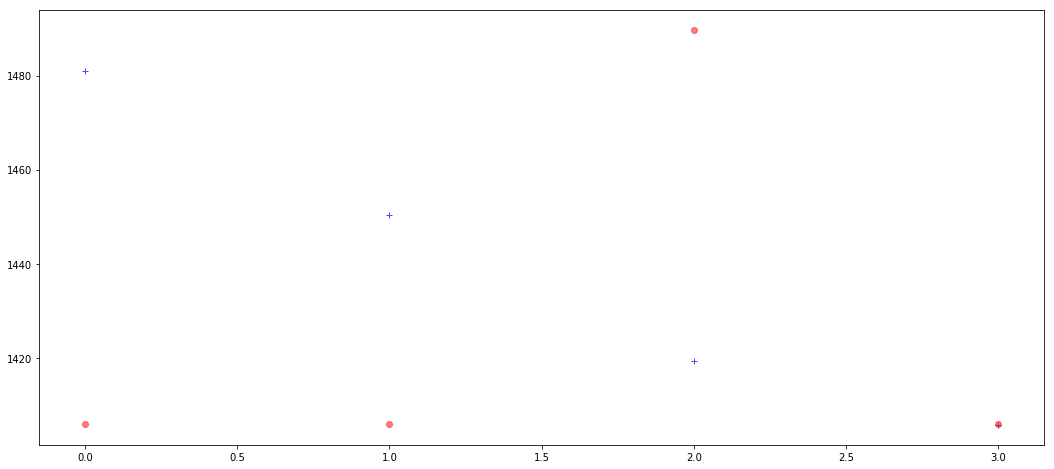

In [146]:
plt.plot(y_validation[0:15], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:15], 'ro', color ='red', alpha=0.5)
plt.show()